# CMSE 202 Final S23 (Sect. 003)


### <p style="text-align: right;"> &#9989; Brandon Grimes </p>
### <p style="text-align: right;"> &#9989; BGrimey0108 </p>

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

In [7]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pylab as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import pickle
import time
from sklearn.decomposition import PCA
import statsmodels.api as sm

import pandas as pd
import seaborn as sns

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of a few characteristics of leaves. This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Leaf#). We’ll ask you a set of questions that center the classification of these leaves using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv`

curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv -O

In [3]:
data = pd.read_csv("leaf_data_cleaned.csv")

data.head()

,Class,Elongation,Isoperimetric Factor,Average Contrast
0,1,0.32396,0.83592,0.127950
1,1,0.36116,0.79867,0.090476
2,1,0.38998,0.80812,0.057445
3,1,0.35376,0.81697,0.065491
4,1,0.44462,0.75493,0.045339


## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different leaf characteristics. Your visualization should represent each of the different leaf types/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

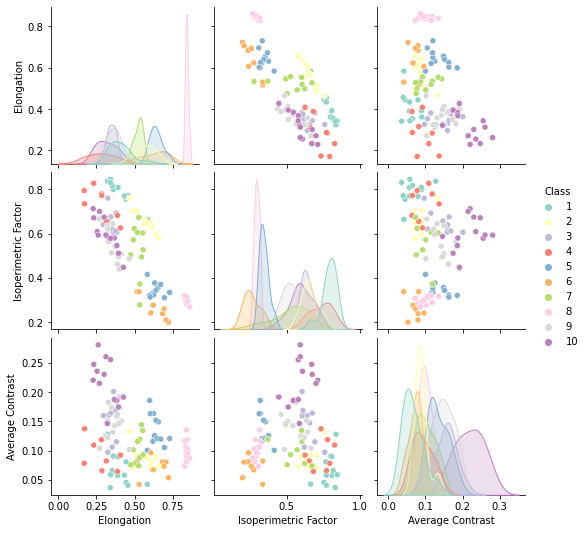

In [30]:
sns.pairplot(data, hue = "Class", palette = "Set3")

plt.rcParams["figure.figsize"] = (30,20)

## Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (i.e., just by eye), which pair of leaves do you think would be **easiest** for an ML technique to differentiate between? Which pair of leaves do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

Note: There is not necessarily one correct answer to these questions, we are looking for your reasoning!

9, 10 and 3 always seem to have some overlap even if one of them has some points far way from the graph, i susspect they would be the hardest to diferentiate. While 8 and 1 are always on the opposite side of the graphs from on another. they would be the easiest to seperate

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for two classes of leaves that you will try to separate. (You may need to use Google to figure out how to do this.)

Note: the 'Class' column labels are integers, not strings.

In [34]:
masked = data[data["Class"].isin([5,10])]

masked

,Class,Elongation,Isoperimetric Factor,Average Contrast
40,5,0.63151,0.37688,0.12554
41,5,0.58345,0.41551,0.10047
42,5,0.62039,0.33077,0.11570
43,5,0.72980,0.33439,0.12051
44,5,0.65580,0.35618,0.14901
45,5,0.69555,0.31039,0.10517
46,5,0.64925,0.35318,0.12036
47,5,0.67175,0.37007,0.11955
48,5,0.63974,0.34354,0.15190
49,5,0.62464,0.32238,0.16335


## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the leaf class identifiers.) Also, set the `random_state` to be 1.

In [56]:
classes = masked["Class"] 

classes = classes.replace(5,0)
classes = classes.replace(10,1)

data_set = masked.drop(labels = "Class", axis = 1)

train_vectors, test_vectors, train_labels, test_labels = train_test_split(data_set, classes, 
                                                                          test_size = 0.25, random_state = 1)

## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. 

**Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge or perfect separation. **It is fine to ignore these warnings.** 

In [58]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
              'gamma': [0.01, 0.1, 1.0, 10.0, 100, 1000],
              'kernel': ['linear','rbf']}
clf1 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_jobs= -1)
clf1 = clf1.fit(train_vectors, train_labels)

print("Best parameters found by grid search:")
print(clf1.best_params_)

Best parameters found by grid search:
{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}


In [59]:
param_grid2 = {'C': [1],
              'gamma': [10]}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid2, n_jobs= -1)
clf = clf.fit(train_vectors, train_labels)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



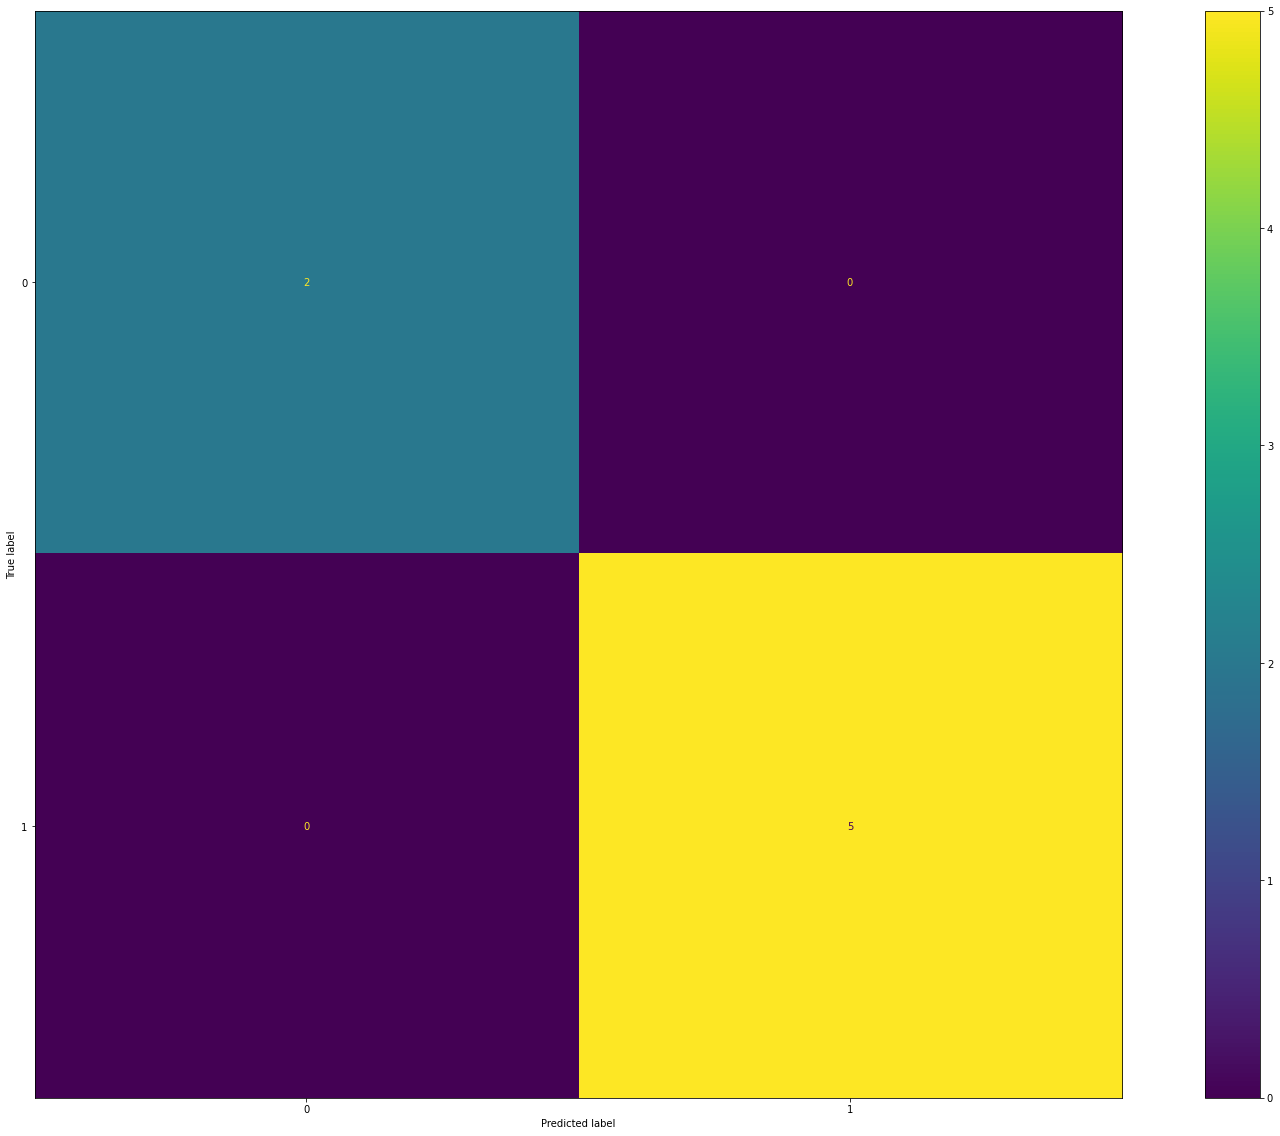

In [60]:
pred_labels = clf.predict(test_vectors)

print(classification_report(test_labels, pred_labels))
ConfusionMatrixDisplay.from_estimator(clf, test_vectors, test_labels)

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data. There are not many data points for this set, so you will see small numbers in the Confusion matrix.

In [61]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



My model was 100% correct in all values as Percision, Recall and Accuracy are all 1.0

## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

This is infintely more accurate then any time I have ran this model in class or on the homework, I assume this was becuase I choose data sets that were pretty easy to seperate

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University